In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('simple_LR_dataset.csv')
ds.head()

,Volume,Price
0,10,20
1,11,25
2,14,26
3,16,27
4,17,24


In [3]:
print(ds)

    Volume  Price
0       10     20
1       11     25
2       14     26
3       16     27
4       17     24
5       18     30
6       19     31
7       20     28
8       22     36
9       24     38
10      27     40
11      29     42
12      32     43
13      35     50
14      38     48
15      42     55
16      46     58
17      50     60
18      58     64
19      64     66
20      68     70
21      70     71


In [4]:
x = ds.iloc[:,:-1].values
y = ds.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Use linear regression

In [6]:
from sklearn.linear_model import LinearRegression

Linear_regressor = LinearRegression()
Linear_regressor.fit(x_train, y_train)
print('The coefficient is:', Linear_regressor.coef_) # slope coeficient
print('The y-intercept is:', Linear_regressor.intercept_) # intercept at y-axis

The coefficient is: [0.86720851]
The y-intercept is: 14.186359624817843


The linear equation is

$ \text{Price} = 14.186359624817847 +0.86720851 * \text{Volume} $

-------------------------------------


In [7]:
y_pred = Linear_regressor.predict(x_test)

In [8]:
#calculate correlation coefficient
# corr close to 1 if it is good
corr = np.corrcoef(y_pred, y_test)
print(corr)

[[1.        0.9885554]
 [0.9885554 1.       ]]


In [12]:
print('Predicted x  Test x')
print('Predicted y  Test y')
for i in range(5):
    print('  %.4f      %d' %(y_pred[i], y_test[i]))

Predicted x  Test x
Predicted y  Test y
  73.1565      70
  37.6010      40
  47.1403      48
  44.5387      50
  23.7257      25


In [10]:
x_test

array([[68],
       [27],
       [38],
       [35],
       [11]], dtype=int64)

## Scatter plot (train set)

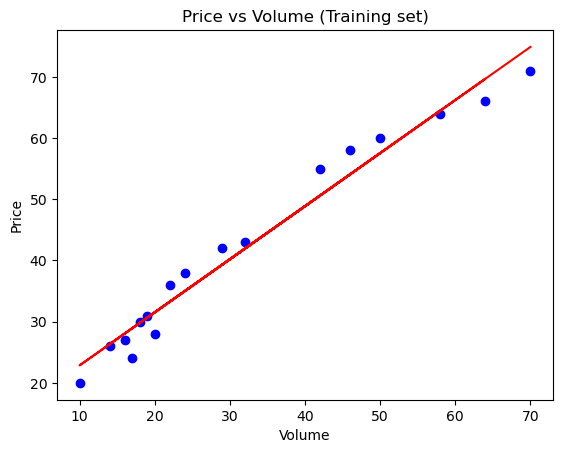

In [13]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, Linear_regressor.predict(x_train), color='red')
plt.title('Price vs Volume (Training set)')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

## Predict

Questions.

Based on the model you have built, if the volume is 65 then what is the price?

In [14]:
y_predict = Linear_regressor.predict([[65]])
print(y_predict)

[70.55491246]


In [15]:
y_predict = Linear_regressor.predict([[105]])
print(y_predict)

[105.24325267]


In [16]:
y_predict = Linear_regressor.predict([[200]])
print(y_predict)

[187.62806067]


In [17]:
y_predict = Linear_regressor.predict([[11]])
print(y_predict)

[23.72565318]


## Scatter plot (test set)

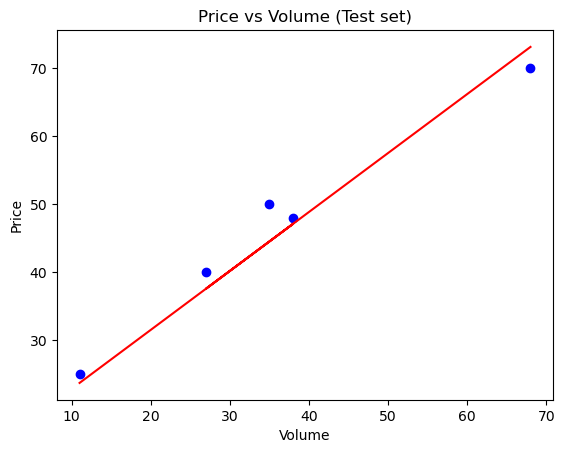

In [18]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, Linear_regressor.predict(x_test), color='red')
plt.title('Price vs Volume (Test set)')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()